# **KAFE ve FIRINLARDA TALEP EDİLEN YİYECEK ve İÇECEK TAHMİNİ**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime 

In [ ]:
data = pd.read_csv("BreadBasket_DMS.csv")
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [ ]:
data.shape

(21293, 4)

In [ ]:
data = data.drop(data[data.Item == 'NONE'].index)

In [ ]:
x = data['Item'] == "NONE"
print(x.value_counts())

False    20507
Name: Item, dtype: int64


# **Ürünlerin Satın Alınma Miktarı ve Oranları**

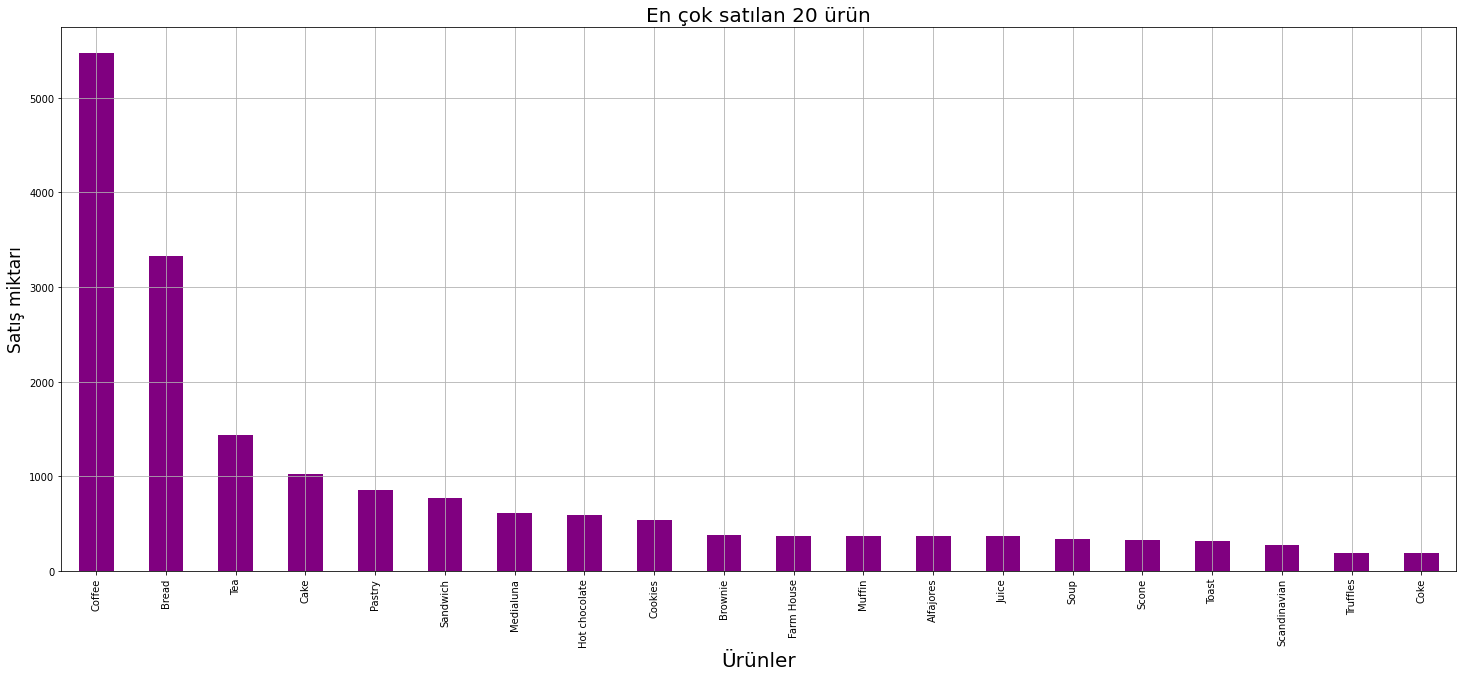

In [ ]:
fig = plt.figure(figsize=(25,10))

yiyecek_sayisi = data['Item'].value_counts()
yiyecek_sayisi[:20].plot(kind='bar',color='purple')

plt.xlabel('Ürünler',fontsize=20)
plt.ylabel('Satış miktarı',fontsize=17)
plt.title('En çok satılan 20 ürün',fontsize=20)
plt.grid()

In [ ]:
yiyecek_sayisi.head(20)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64

Text(0.5, 1.0, 'En çok satılan 10 ürün ve yüzdesel gösterimi')

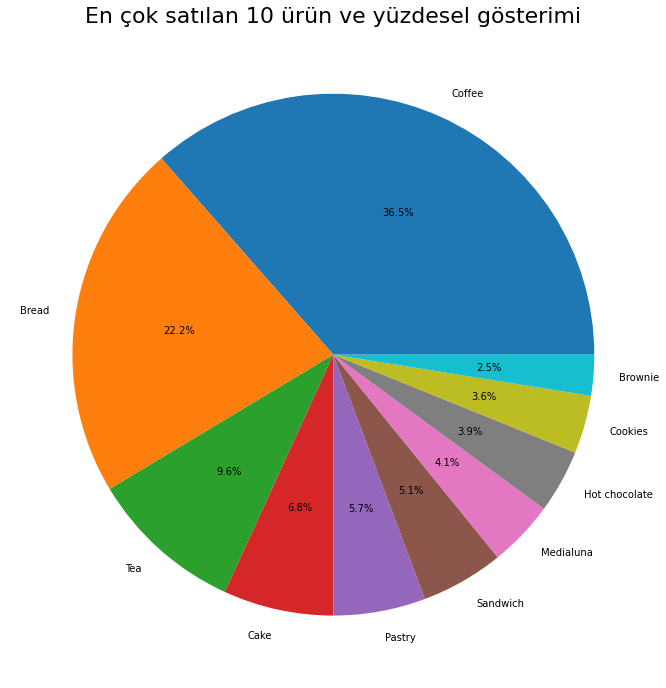

In [ ]:
yiyecek_sayisi[:10].plot.pie(y='Item',autopct='%1.1f%%',figsize=(12,12),ylabel='')
plt.title('En çok satılan 10 ürün ve yüzdesel gösterimi',fontsize=22)

# **Tüm Ürünlerin Saatlik, Günlük, Haftalık ve Aylık Genel Satış Analizi**

In [ ]:
data['datetime'] = pd.to_datetime(data['Date']+" "+data['Time'])
data['Hafta'] = data['datetime'].dt.week
data['Ay'] = data['datetime'].dt.month
data['Hafta Günü'] = data['datetime'].dt.weekday+1
data['Saat'] = data['datetime'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
zaman=data[['Date', 'Ay','Hafta', 'Hafta Günü','Saat']]
zaman

,Date,Ay,Hafta,Hafta Günü,Saat
0,2016-10-30,10,43,7,9
1,2016-10-30,10,43,7,10
2,2016-10-30,10,43,7,10
3,2016-10-30,10,43,7,10
4,2016-10-30,10,43,7,10
...,...,...,...,...,...
21288,2017-04-09,4,14,7,14
21289,2017-04-09,4,14,7,14
21290,2017-04-09,4,14,7,14
21291,2017-04-09,4,14,7,14


- Projemizin İlerleyen dönemlerinde hafta günlerinin ve saatlerin detaylı analizini yaparak hangi saatlerde ne kadar müşteri geldiğinin analizini yapıp işgücü optimizasyonu sağlayıp gün yoğunluğuna göre eleman çalıştıracağız

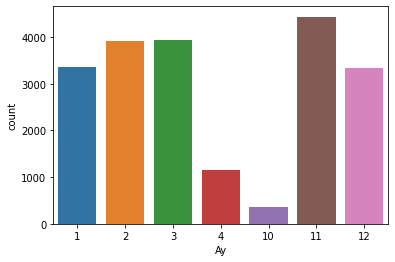

In [ ]:
sns.countplot(x='Ay',data=zaman)

- **Kış aylarında yaz aylarına göre daha fazla satış yapılıyor ve satışlarda aylık düşüş ve yükseliş nedenleri araştırılabilir**

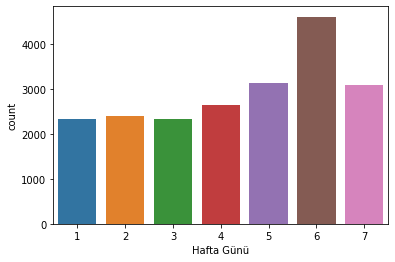

In [ ]:
sns.countplot(x='Hafta Günü',data=zaman)

- **Cumartesi günleri diğer günlere göre daha fazla satış yapılıyor ve satışlarda günlük satış değerlerinin neden artıp azaldığının analizi yapılabilir**

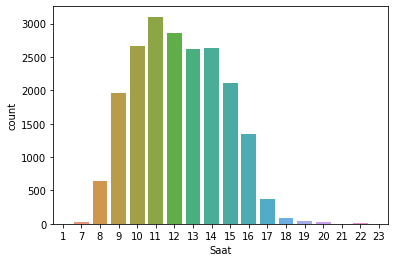

In [ ]:
sns.countplot(x='Saat',data=zaman)

- **Öğle saatlerinde diğer saatlere oranla daha çok satış yapılıyor**

# **Mevsimsel Haftalık ve Günlük Satış Analizi**

In [ ]:
tarih = [datetime.strptime(x, '%Y-%m-%d').date() for x in data['Date']]

In [ ]:
zaman = [datetime.strptime(x,  '%H:%M:%S').time() for x in data['Time']]

In [ ]:
def day(hour):
    if hour >= 6 and hour < 12:
        return 'Sabah'
    elif hour >= 12 and hour < 15:
        return 'Öğle'
    elif hour >= 15 and hour < 20:
        return 'Akşam'
    else: 
        return 'Gece'

In [ ]:
gun_vakitleri = [day(x.hour) for x in zaman]

In [ ]:
type(gun_vakitleri)

list

In [ ]:
data['Gün Vakitleri'] = gun_vakitleri

In [ ]:
data.head()

,Date,Time,Transaction,Item,Gün Vakitleri
0,2016-10-30,09:58:11,1,Bread,Sabah
1,2016-10-30,10:05:34,2,Scandinavian,Sabah
2,2016-10-30,10:05:34,2,Scandinavian,Sabah
3,2016-10-30,10:07:57,3,Hot chocolate,Sabah
4,2016-10-30,10:07:57,3,Jam,Sabah


In [ ]:
# Öğeleri günün saatine göre gruplandıralım ve sayalım
gunleri_say = data.groupby(['Gün Vakitleri','Item'])['Item'].agg('count')

sabah = gunleri_say.loc['Sabah'].sort_values(ascending=False)[:6]
ogle = gunleri_say.loc['Öğle'].sort_values(ascending=False)[:6]
aksam = gunleri_say.loc['Akşam'].sort_values(ascending=False)[:6]
gece = gunleri_say.loc['Gece'].sort_values(ascending=False)[:6]

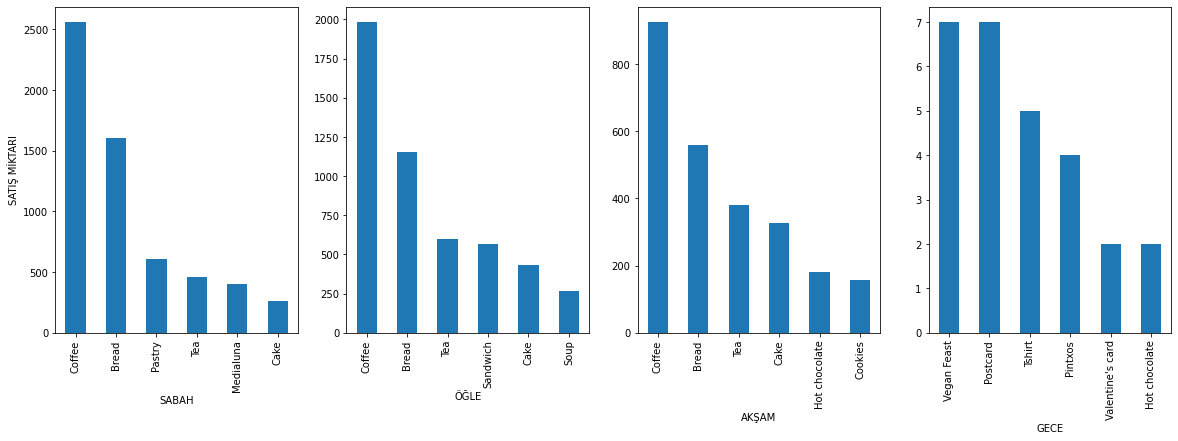

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,6))
sabah.plot(kind='bar',ax=ax1).set(xlabel="SABAH", ylabel="SATIŞ MİKTARI")
ogle.plot(kind='bar',ax=ax2).set(xlabel="ÖĞLE")
aksam.plot(kind='bar',ax=ax3).set(xlabel="AKŞAM")
gece.plot(kind='bar',ax=ax4).set(xlabel="GECE")
plt.show()

In [ ]:
ay_numarasi = [date.month for date in tarih]

In [ ]:
def aylar(month):
    if month >=1 and month <=2:
        return 'Kış'
    elif month >=3 and month <=5:
        return 'İlkbahar'
    else:
        return 'Sonbahar'

In [ ]:
sezon = [aylar(month) for month in ay_numarasi]
data['Sezon'] = sezon

In [ ]:
data.head()

,Date,Time,Transaction,Item,Gün Vakitleri,Sezon
0,2016-10-30,09:58:11,1,Bread,Sabah,Sonbahar
1,2016-10-30,10:05:34,2,Scandinavian,Sabah,Sonbahar
2,2016-10-30,10:05:34,2,Scandinavian,Sabah,Sonbahar
3,2016-10-30,10:07:57,3,Hot chocolate,Sabah,Sonbahar
4,2016-10-30,10:07:57,3,Jam,Sabah,Sonbahar


In [ ]:
populer_sezon = data.groupby(['Sezon','Item'])['Item'].agg('count')

In [ ]:
kis=populer_sezon.loc['Kış'].sort_values()[-8:-1]
ilkbahar = populer_sezon.loc['İlkbahar'].sort_values()[-8:]
sonbahar=populer_sezon.loc['Sonbahar'].sort_values()[-8:]

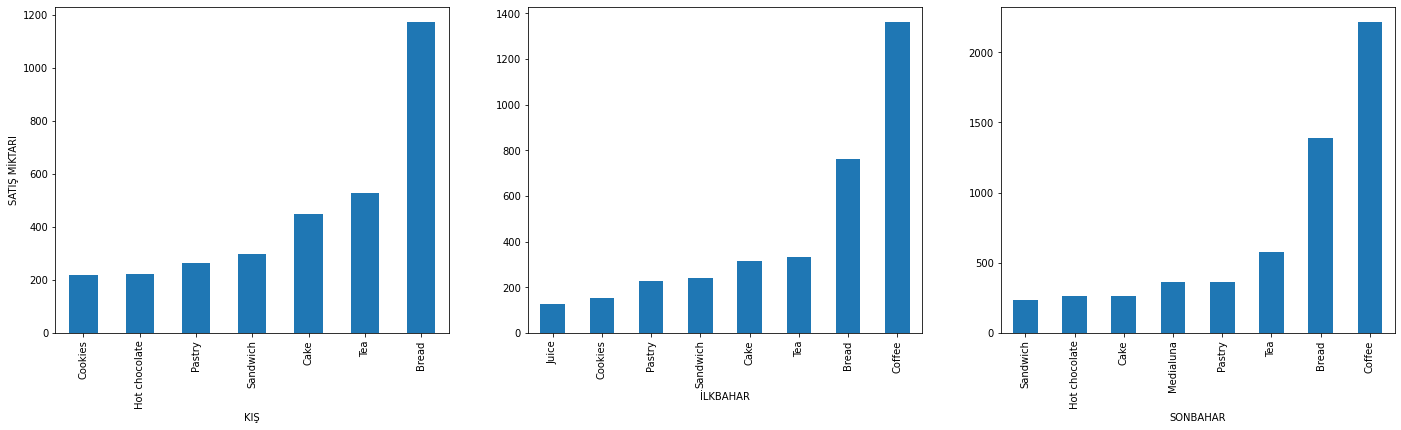

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(24,6))
kis.plot(kind='bar',ax=ax1).set(xlabel="KIŞ", ylabel="SATIŞ MİKTARI")
ilkbahar.plot(kind='bar',ax=ax2).set(xlabel="İLKBAHAR")
sonbahar.plot(kind='bar',ax=ax3).set(xlabel="SONBAHAR")
plt.show()

In [ ]:
hangi_gun = [date.day for date in tarih]

In [ ]:
def ay(day):
    if day == 1:
        return 'Pazartesi'
    elif day== 2:
        return 'Salı'
    elif day == 3:
        return 'Çarşamba'
    elif day == 4:
        return 'Perşembe'
    elif day == 5:
        return 'Cuma'
    elif day == 6:
        return 'Cumartesi'
    else:
        return 'Pazar'

In [ ]:
Hangi_Gu = [ay(day) for day in hangi_gun]
data['Gün'] = Hangi_Gu

In [ ]:
data.head()

,Date,Time,Transaction,Item,Gün Vakitleri,Sezon,Gün
0,2016-10-30,09:58:11,1,Bread,Sabah,Sonbahar,Pazar
1,2016-10-30,10:05:34,2,Scandinavian,Sabah,Sonbahar,Pazar
2,2016-10-30,10:05:34,2,Scandinavian,Sabah,Sonbahar,Pazar
3,2016-10-30,10:07:57,3,Hot chocolate,Sabah,Sonbahar,Pazar
4,2016-10-30,10:07:57,3,Jam,Sabah,Sonbahar,Pazar


In [ ]:
populer_gunler = data.groupby(['Gün','Item'])['Item'].agg('count')

In [ ]:
pazartesi=populer_gunler.loc['Pazartesi'].sort_values(ascending=False)[:5]
sali=populer_gunler.loc['Salı'].sort_values(ascending=False)[:5]
carsamba=populer_gunler.loc['Çarşamba'].sort_values(ascending=False)[:5]
persembe=populer_gunler.loc['Perşembe'].sort_values(ascending=False)[:5]
cuma=populer_gunler.loc['Cuma'].sort_values(ascending=False)[:5]
cumartesi=populer_gunler.loc['Cumartesi'].sort_values(ascending=False)[:5]
pazar=populer_gunler.loc['Pazar'].sort_values(ascending=False)[:5]

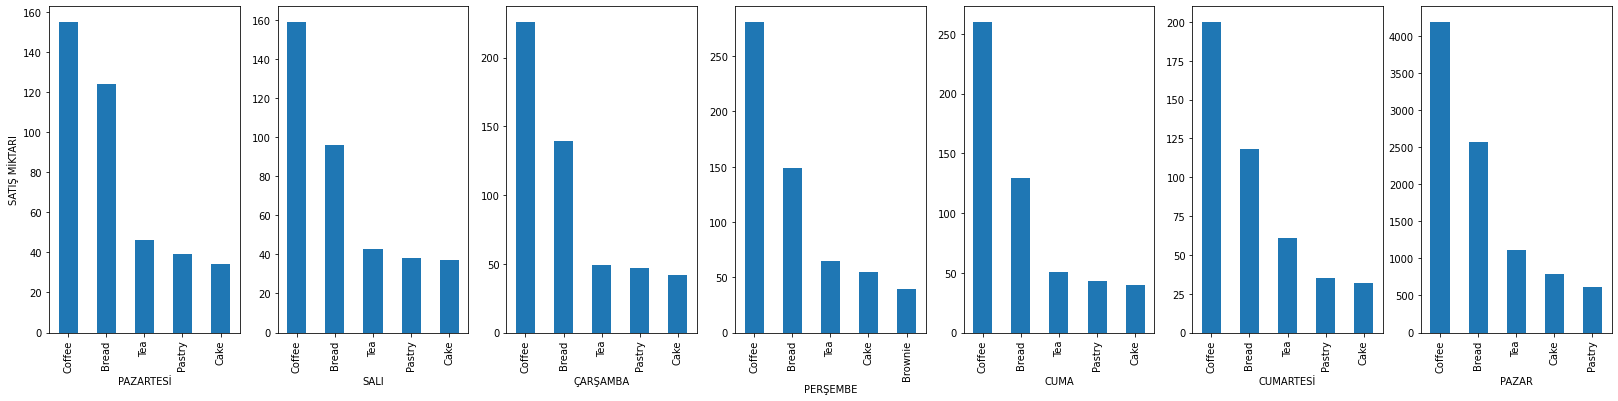

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7,figsize=(28,6))
pazartesi.plot(kind='bar',ax=ax1).set(xlabel="PAZARTESİ", ylabel="SATIŞ MİKTARI")
sali.plot(kind='bar',ax=ax2).set(xlabel="SALI")
carsamba.plot(kind='bar',ax=ax3).set(xlabel="ÇARŞAMBA")
persembe.plot(kind='bar',ax=ax4).set(xlabel="PERŞEMBE")
cuma.plot(kind='bar',ax=ax5).set(xlabel="CUMA")
cumartesi.plot(kind='bar',ax=ax6).set(xlabel="CUMARTESİ")
pazar.plot(kind='bar',ax=ax7).set(xlabel="PAZAR")
plt.show()

# **Satılan Ürünlerin Tarihe Göre Kategorize Edilmesi**

- Projemizin sonunda genel analizi dışında ürünlerinde özel satış tarihi ve saatlerinin analizini yapacağız. Böylelikle hangi ürünün hangi tarihte ne kadar satıldığının analizi yapılarak ürün envanterini taze tutup hem ekonomik zararın önüne geçmek hem de israfı en aza indirmeyi planlıyoruz.

In [ ]:
gunun_bolumleri=data.copy()
gunun_bolumleri['saat'] = gunun_bolumleri.Date.astype(str).str.cat(gunun_bolumleri.Time.astype(str), sep=' ')
gunun_bolumleri['saat']=pd.to_datetime(gunun_bolumleri['saat'])

gunun_bolumleri['hour'] = gunun_bolumleri['saat'].dt.round('H').dt.hour #round yuvarladı
gunun_bolumleri.drop(['Time','Date'],axis=1,inplace=True)

Text(0, 0.5, 'Kahve Satılma Sayısı')

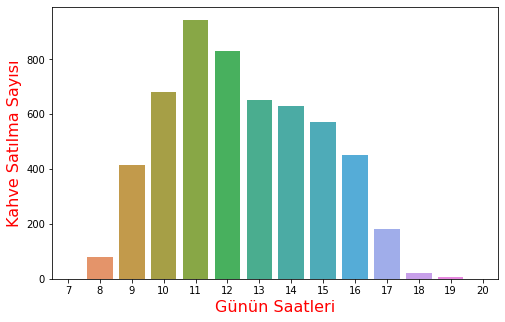

In [ ]:
#en yoğun kahve satılma saatleri
kahve_saatleri=gunun_bolumleri[gunun_bolumleri['Item']=='Coffee']
kahve_saatleri=kahve_saatleri.groupby('hour')['Item'].count()
kahve_saatleri=kahve_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=kahve_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Kahve Satılma Sayısı',fontsize=16,color='r')

In [ ]:
kahve_saatleri

,hour,Item
0,7,1
1,8,81
2,9,414
3,10,682
4,11,944
5,12,831
6,13,651
7,14,630
8,15,571
9,16,453


Text(0, 0.5, 'Ekmek Satılma Sayısı')

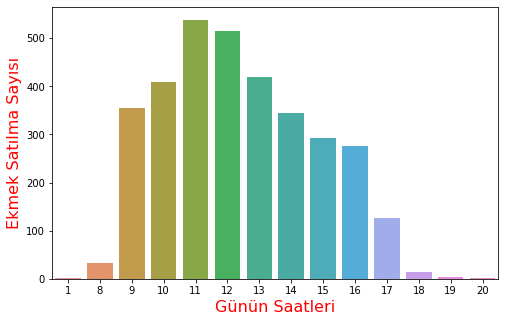

In [ ]:
# en yoğun Ekmek satılma saatleri
ekmek_saatleri=gunun_bolumleri[gunun_bolumleri['Item']=='Bread']
ekmek_saatleri=ekmek_saatleri.groupby('hour')['Item'].count()
ekmek_saatleri=ekmek_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=ekmek_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Ekmek Satılma Sayısı',fontsize=16,color='r')

In [ ]:
ekmek_saatleri

,hour,Item
0,1,1
1,8,33
2,9,354
3,10,409
4,11,538
5,12,514
6,13,419
7,14,345
8,15,293
9,16,275


Text(0, 0.5, 'Kek yada Hamur işi Satılma Sayısı')

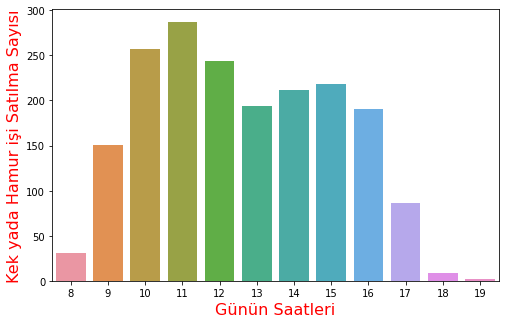

In [ ]:
# en yoğun Pasta ve hamurişi satılma saatleri
kek_saatleri=gunun_bolumleri.loc[(gunun_bolumleri['Item']=='Cake') | (gunun_bolumleri['Item']=='Pastry')]
kek_saatleri=kek_saatleri.groupby('hour')['Item'].count()
kek_saatleri=kek_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=kek_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Kek yada Hamur işi Satılma Sayısı',fontsize=16,color='r')

In [ ]:
kek_saatleri

,hour,Item
0,8,31
1,9,151
2,10,257
3,11,287
4,12,244
5,13,194
6,14,212
7,15,218
8,16,190
9,17,86


Text(0, 0.5, 'Çay Satılma Sayısı')

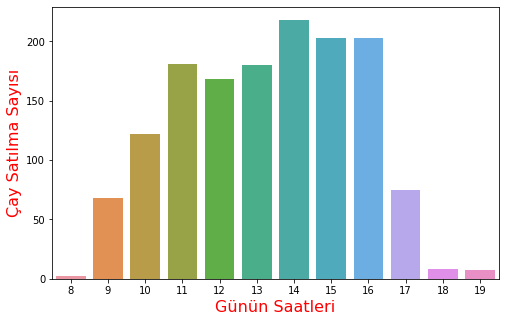

In [ ]:
# en yoğun çay satılma saatleri
cay_saatleri=gunun_bolumleri.loc[(gunun_bolumleri['Item']=='Tea')]
cay_saatleri=cay_saatleri.groupby('hour')['Item'].count()
cay_saatleri=cay_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=cay_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Çay Satılma Sayısı',fontsize=16,color='r')

In [ ]:
cay_saatleri

,hour,Item
0,8,2
1,9,68
2,10,122
3,11,181
4,12,168
5,13,180
6,14,218
7,15,203
8,16,203
9,17,75


Text(0, 0.5, 'Sandwich Satılma Sayısı')

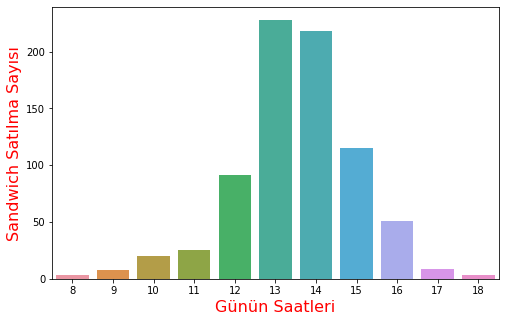

In [ ]:
# en yoğun sandwich satılma saatleri
sandwich_saatleri=gunun_bolumleri.loc[(gunun_bolumleri['Item']=='Sandwich')]
sandwich_saatleri=sandwich_saatleri.groupby('hour')['Item'].count()
sandwich_saatleri=sandwich_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=sandwich_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Sandwich Satılma Sayısı',fontsize=16,color='r')

In [ ]:
sandwich_saatleri

,hour,Item
0,8,3
1,9,8
2,10,20
3,11,25
4,12,91
5,13,228
6,14,218
7,15,115
8,16,51
9,17,9


Text(0, 0.5, 'Kurabiye Satılma Sayısı')

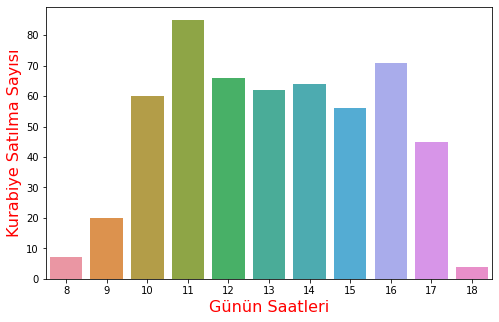

In [ ]:
# en yoğun Kurabiye satılma saatleri
Kurabiye_saatleri=gunun_bolumleri.loc[(gunun_bolumleri['Item']=='Cookies')]
Kurabiye_saatleri=Kurabiye_saatleri.groupby('hour')['Item'].count()
Kurabiye_saatleri=Kurabiye_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=Kurabiye_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Kurabiye Satılma Sayısı',fontsize=16,color='r')

In [ ]:
Kurabiye_saatleri

,hour,Item
0,8,7
1,9,20
2,10,60
3,11,85
4,12,66
5,13,62
6,14,64
7,15,56
8,16,71
9,17,45


Text(0, 0.5, 'Çorba Satılma Sayısı')

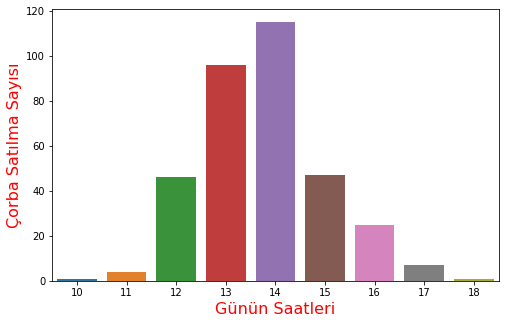

In [ ]:
# en yoğun corba satılma saatleri
corba_saatleri=gunun_bolumleri.loc[(gunun_bolumleri['Item']=='Soup')]
corba_saatleri=corba_saatleri.groupby('hour')['Item'].count()
corba_saatleri=corba_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=corba_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Çorba Satılma Sayısı',fontsize=16,color='r')

In [ ]:
corba_saatleri

,hour,Item
0,10,1
1,11,4
2,12,46
3,13,96
4,14,115
5,15,47
6,16,25
7,17,7
8,18,1


Text(0, 0.5, 'Tost Satılma Sayısı')

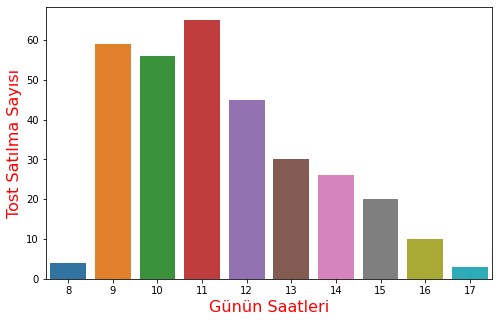

In [ ]:
#en yoğun tost satılma saatleri
tost_saatleri=gunun_bolumleri[gunun_bolumleri['Item']=='Toast']
tost_saatleri=tost_saatleri.groupby('hour')['Item'].count()
tost_saatleri=tost_saatleri.reset_index()

fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(data=tost_saatleri,x='hour',y='Item')
ax.set_xlabel('Günün Saatleri',fontsize=16,color='r')
ax.set_ylabel('Tost Satılma Sayısı',fontsize=16,color='r')

In [ ]:
tost_saatleri

,hour,Item
0,8,4
1,9,59
2,10,56
3,11,65
4,12,45
5,13,30
6,14,26
7,15,20
8,16,10
9,17,3


# **Hangi Ürünlerin Birlikte Tercih Edildiğinin Analizi (Birliktelik Analizi)**

- Çay ile hangi ürünün daha çok alındığının analizi

In [ ]:
def cay_fonk(grup):
    eslesme = grup['Item'].str.contains('Tea')
    return data.loc[eslesme]
    
cay = data[data['Item'].str.contains('Tea')]['Transaction'].unique()

In [ ]:
cay = pd.DataFrame(cay,columns=['Transaction'])
cay_birlesik=cay.merge(data)
cay_birlesik = cay_birlesik[~cay_birlesik.Item.str.contains('Tea')]['Item'].value_counts()

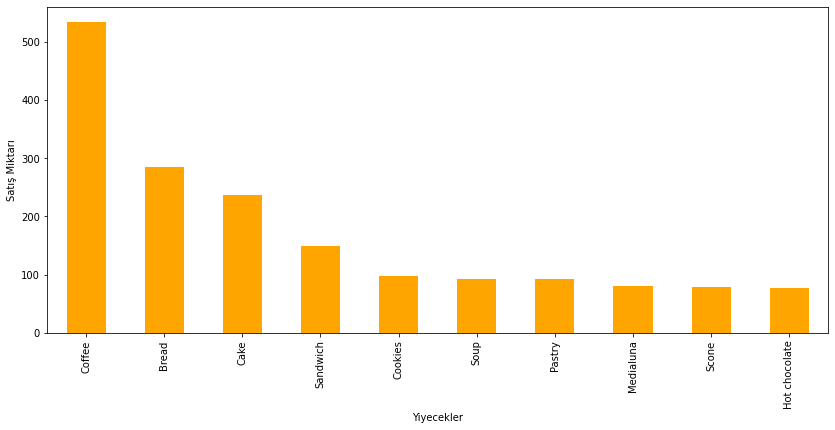

In [ ]:
plt.figure(figsize=(14,6))
cay_birlesik[:10].plot(kind='bar',color='orange').set(xlabel="Yiyecekler", ylabel="Satış Miktarı")
plt.show()

- Çayın yanında en çok kahve alınıyor. Bu sebeple taleple orantılı bir şekilde pazarlama stratejisi geliştirilerek ürünler belli bir paket halinde yada farklı stratejiler ile ekonomik olarak kazanç sağlayacak şekilde satılabilir.

In [ ]:
cay_birlesik.head(10)

Coffee           533
Bread            284
Cake             237
Sandwich         150
Cookies           97
Soup              93
Pastry            93
Medialuna         81
Scone             79
Hot chocolate     77
Name: Item, dtype: int64

Şimdi, bir müşteri bir ürün satın alırsa daha sonra hangi ürünü alacağını anlamak için apriori algoritmasını çalıştırmamız gerekiyor.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
hot_encoded_data = data.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [ ]:
hot_encoded_data.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_data = hot_encoded_data.applymap(encode_units)

In [ ]:
frequent_itemsets = apriori(hot_encoded_data, min_support=0.01, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


- **support :** bir öğenin varsayılan popülerliğini ifade eder ve belirli bir öğeyi içeren işlem sayısının toplam işlem sayısına bölünmesiyle hesaplanabilir.

- **confidence :** A öğesi satın alınırsa bir B öğesinin de satın alınma olasılığını ifade eder. A ve B'nin birlikte satın alındığı işlem sayısının, A'nın satın alındığı toplam işlem sayısına bölünmesiyle hesaplanabilir.

- **lift :** A öğesi satıldığında B'nin satış oranındaki artışı ifade eder. 

- **laverage :** birlikte görünen A ve C'nin gözlemlenen frekansı ile A ve C bağımsız olsaydı beklenen frekans arasındaki farkı hesaplar



In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
8,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
9,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


In [ ]:
rules = rules.sort_values(['confidence'], ascending=False)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
9,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
5,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
6,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
4,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
2,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [ ]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


In [ ]:
rules = rules.sort_values(['lift'], ascending=False)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
10,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
11,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
30,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
37,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
36,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


Yalnızca güvenin %50'ye eşit veya daha büyük olduğu kuralları görmek istiyoruz, bu nedenle:

In [ ]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


Örneğin son kuraldan tost ve kahvenin genellikle birlikte satın alındığını görebiliriz. Bu mantıklı çünkü tost satın alan insanlar onunla kahve içmek istiyor.


Bu kuralın destek değeri 0.023666'dır. Bu sayı, tost içeren işlem sayısının toplam işlem sayısına bölünmesiyle hesaplanır. Kuralın güven düzeyi 0.704403 olup, tost içeren tüm işlemlerden %70,44'ünün kahve de içerdiğini göstermektedir. Son olarak, 1,47'lik artış bize, kahve satışının varsayılan olasılığına kıyasla, tost satın alan müşteriler tarafından kahve satın alma olasılığının 1,47 kat daha fazla olduğunu söylüyor.